# Introduction

### Objective: Find ways to more acuratly predict the S&P 500

### Scenario: I am an analyst at an investment firm trying to find variables to predict the market in order to maximize fund returns.

### import libraries

In [395]:
import pandas as pd
import numpy as np

In [594]:

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import plotly as py
# import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
# import pmdarima as pm
# from pmdarima.arima import auto_arima
# from pyramid.arima.utils import ndiffs
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')
# %matplotlib notebook
import seaborn as sns

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
# plt.style.use('ggplot')

! pip install pmdarima


from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from pmdarima import metrics
from sklearn.metrics import mean_squared_error


ERROR: Operation cancelled by user


In [467]:
#import data
df=pd.read_csv('/content/finalDF')

In [468]:
df

,Date,Price Value,s-p-500-dividend/by-month,s-p-500-dividend-yield/by-month,s-p-500-earnings/by-month,s-p-500-earnings-yield/by-month,s-p-500-pe-ratio/by-month,inflation-adjusted-s-p-500/by-month,shiller-pe/by-month,10-year-treasury-rate/by-month,cpi/by-month,inflation/by-month
0,2020-11-01,3695.31,60.00,1.65,98.00,2.69,37.16,3642.07,32.47,0.87,260.23,1.17
1,2020-10-01,3548.99,60.16,1.72,99.34,2.83,35.30,3506.22,31.28,0.79,260.39,1.18
2,2020-09-01,3418.70,60.38,1.75,100.78,2.92,34.27,3453.11,30.84,0.68,260.28,1.37
3,2020-08-01,3365.52,60.75,1.74,101.26,2.91,34.41,3484.83,31.16,0.65,259.92,1.31
4,2020-07-01,3391.71,61.23,1.85,101.93,3.08,32.44,3306.08,29.60,0.62,259.10,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...
1782,1872-05-01,5.13,5.63,5.34,8.39,7.96,12.56,105.36,12.28,5.43,13.13,7.01
1783,1872-04-01,5.18,5.56,5.28,8.34,7.92,12.63,105.36,12.25,5.41,13.13,4.54
1784,1872-03-01,5.18,5.62,5.36,8.48,8.09,12.37,104.82,12.18,5.40,12.84,-1.46
1785,1872-02-01,5.04,5.63,5.47,8.55,8.30,12.05,103.02,11.96,5.38,12.65,-1.48


In [469]:
#check data format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 1787 non-null   object 
 1   Price Value                          1787 non-null   float64
 2   s-p-500-dividend/by-month            1787 non-null   float64
 3   s-p-500-dividend-yield/by-month      1787 non-null   float64
 4   s-p-500-earnings/by-month            1787 non-null   float64
 5   s-p-500-earnings-yield/by-month      1787 non-null   float64
 6   s-p-500-pe-ratio/by-month            1787 non-null   float64
 7   inflation-adjusted-s-p-500/by-month  1787 non-null   float64
 8   shiller-pe/by-month                  1787 non-null   float64
 9   10-year-treasury-rate/by-month       1787 non-null   float64
 10  cpi/by-month                         1787 non-null   float64
 11  inflation/by-month            

In [470]:
#change data column to date/time value and set it to index
df['Date']=pd.to_datetime(df['Date'])
df.set_index(df['Date'],inplace=True)
df.drop(columns=['Date'],inplace=True)
df

,Price Value,s-p-500-dividend/by-month,s-p-500-dividend-yield/by-month,s-p-500-earnings/by-month,s-p-500-earnings-yield/by-month,s-p-500-pe-ratio/by-month,inflation-adjusted-s-p-500/by-month,shiller-pe/by-month,10-year-treasury-rate/by-month,cpi/by-month,inflation/by-month
Date,,,,,,,,,,,
2020-11-01,3695.31,60.00,1.65,98.00,2.69,37.16,3642.07,32.47,0.87,260.23,1.17
2020-10-01,3548.99,60.16,1.72,99.34,2.83,35.30,3506.22,31.28,0.79,260.39,1.18
2020-09-01,3418.70,60.38,1.75,100.78,2.92,34.27,3453.11,30.84,0.68,260.28,1.37
2020-08-01,3365.52,60.75,1.74,101.26,2.91,34.41,3484.83,31.16,0.65,259.92,1.31
2020-07-01,3391.71,61.23,1.85,101.93,3.08,32.44,3306.08,29.60,0.62,259.10,0.99
...,...,...,...,...,...,...,...,...,...,...,...
1872-05-01,5.13,5.63,5.34,8.39,7.96,12.56,105.36,12.28,5.43,13.13,7.01
1872-04-01,5.18,5.56,5.28,8.34,7.92,12.63,105.36,12.25,5.41,13.13,4.54
1872-03-01,5.18,5.62,5.36,8.48,8.09,12.37,104.82,12.18,5.40,12.84,-1.46


In [471]:
#sort values from earliest to latest
df.sort_index(inplace=True)

In [472]:
#double check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1787 entries, 1872-01-01 to 2020-11-01
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Price Value                          1787 non-null   float64
 1   s-p-500-dividend/by-month            1787 non-null   float64
 2   s-p-500-dividend-yield/by-month      1787 non-null   float64
 3   s-p-500-earnings/by-month            1787 non-null   float64
 4   s-p-500-earnings-yield/by-month      1787 non-null   float64
 5   s-p-500-pe-ratio/by-month            1787 non-null   float64
 6   inflation-adjusted-s-p-500/by-month  1787 non-null   float64
 7   shiller-pe/by-month                  1787 non-null   float64
 8   10-year-treasury-rate/by-month       1787 non-null   float64
 9   cpi/by-month                         1787 non-null   float64
 10  inflation/by-month                   1787 non-null   float64
dtypes: float64(1

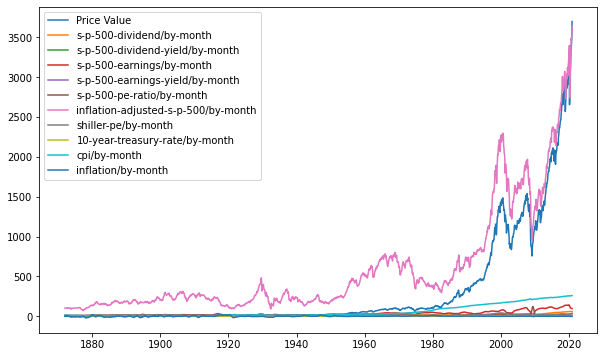

In [473]:
#plot data
fig = plt.figure(figsize=(10,6))
orig = plt.plot(df)
plt.legend(df.columns,loc='best')


In [474]:

df.describe()

,Price Value,s-p-500-dividend/by-month,s-p-500-dividend-yield/by-month,s-p-500-earnings/by-month,s-p-500-earnings-yield/by-month,s-p-500-pe-ratio/by-month,inflation-adjusted-s-p-500/by-month,shiller-pe/by-month,10-year-treasury-rate/by-month,cpi/by-month,inflation/by-month
count,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000
mean,309.128892,17.033262,4.304231,33.951091,7.312518,15.886083,590.622378,16.786659,4.518176,61.467331,2.228394
std,627.301348,10.578865,1.715589,28.651127,2.720893,8.463543,667.344788,6.813805,2.305791,74.929838,5.843850
min,2.730000,5.340000,1.110000,4.480000,0.810000,5.310000,72.260000,4.780000,0.620000,6.280000,-19.700000
25%,7.950000,9.260000,3.110000,13.865000,5.505000,11.480000,183.445000,11.675000,3.185000,10.180000,0.000000
50%,17.460000,14.100000,4.250000,23.040000,6.730000,14.870000,277.200000,15.860000,3.820000,20.400000,2.260000
75%,157.650000,21.775000,5.350000,42.785000,8.710000,18.165000,686.625000,20.430000,5.095000,100.450000,4.530000
max,3695.310000,62.130000,13.840000,144.940000,18.820000,123.730000,3642.070000,44.190000,15.320000,260.390000,23.670000


In [475]:
#check for correlations with price
df.corr()['Price Value']

Price Value                            1.000000
s-p-500-dividend/by-month              0.915552
s-p-500-dividend-yield/by-month       -0.621319
s-p-500-earnings/by-month              0.900433
s-p-500-earnings-yield/by-month       -0.437378
s-p-500-pe-ratio/by-month              0.427866
inflation-adjusted-s-p-500/by-month    0.971655
shiller-pe/by-month                    0.674631
10-year-treasury-rate/by-month        -0.132116
cpi/by-month                           0.904272
inflation/by-month                     0.009979
Name: Price Value, dtype: float64

In [476]:
# Price is correlated with dividend, earnings, infaltion adjusted price, shiller pe, and cpi
# and inverssly correlated with dividend-yield

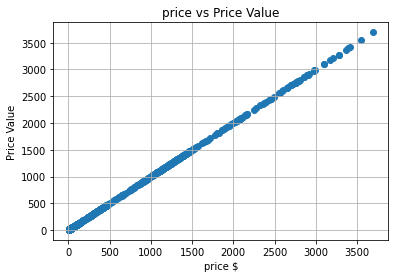

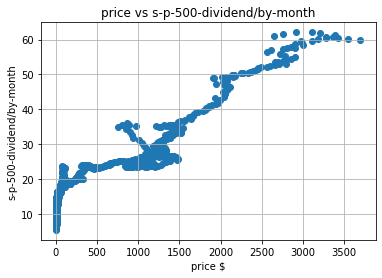

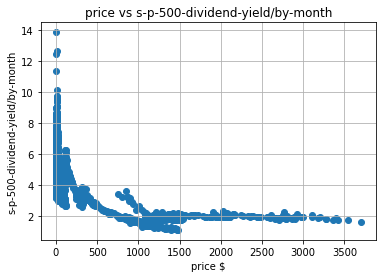

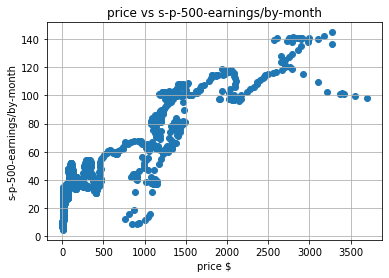

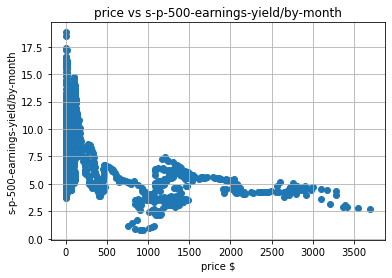

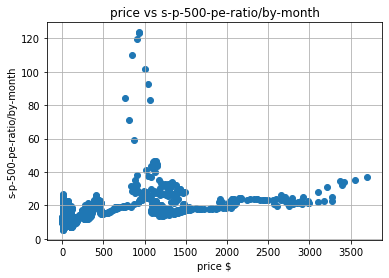

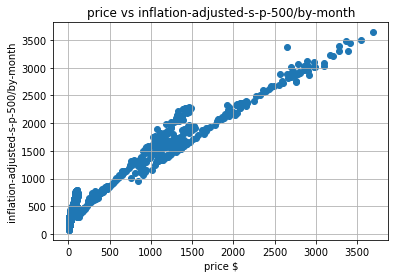

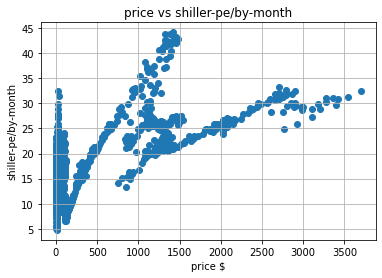

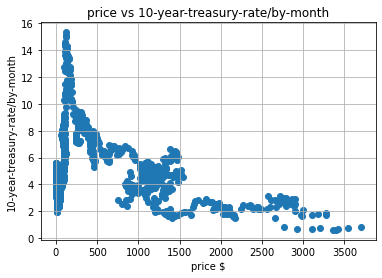

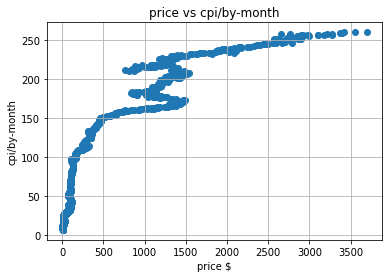

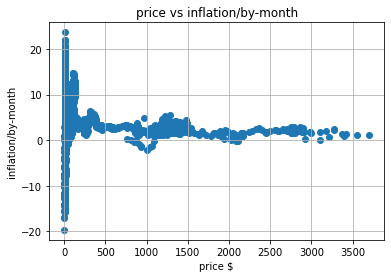

In [477]:
# vizualize correlations
for i in df.columns:
  plt.grid(True)
  plt.title('price vs ' + str(i))
  plt.xlabel("price $")
  plt.ylabel(i)

  plt.scatter(df['Price Value'], df[i])
  plt.show()


In [478]:
#check if correlations exist in the % change data
df.pct_change().dropna().corr()['Price Value']

Price Value                            1.000000
s-p-500-dividend/by-month              0.013724
s-p-500-dividend-yield/by-month       -0.255570
s-p-500-earnings/by-month              0.066893
s-p-500-earnings-yield/by-month       -0.153678
s-p-500-pe-ratio/by-month              0.167612
inflation-adjusted-s-p-500/by-month    0.273376
shiller-pe/by-month                    0.273457
10-year-treasury-rate/by-month        -0.067791
cpi/by-month                           0.006094
inflation/by-month                    -0.053084
Name: Price Value, dtype: float64

In [479]:
#there doesn't appear to be much correlation of value % changes to any exog variables

In [482]:
# check for stationarity 
def stat_check(df,logs):
    
    
    # rolling stats
    roll_mean = df.rolling(window=8, center=False).mean()
    roll_std = df.rolling(window=8, center=False).std()
    
    # Dickey Fuller test
    dftest = adfuller(df,maxlag=logs) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(8,6))
    orig = plt.plot(df, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling_mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling_std')
    plt.legend(loc='best')
    plt.title(str(df.name)+' Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test
    print('Results of df Test: \n')

    df_out = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        df_out['Critical Value (%s)'%key] = value
    print(df_out)


Price Value


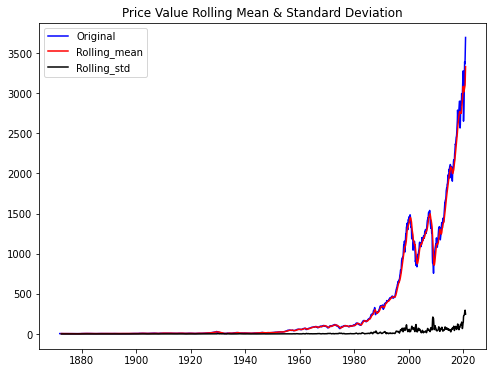

Results of df Test: 

Test Statistic                    6.166837
p-value                           1.000000
#Lags Used                        1.000000
Number of Observations Used    1785.000000
Critical Value (1%)              -3.434019
Critical Value (5%)              -2.863161
Critical Value (10%)             -2.567633
dtype: float64


s-p-500-dividend/by-month


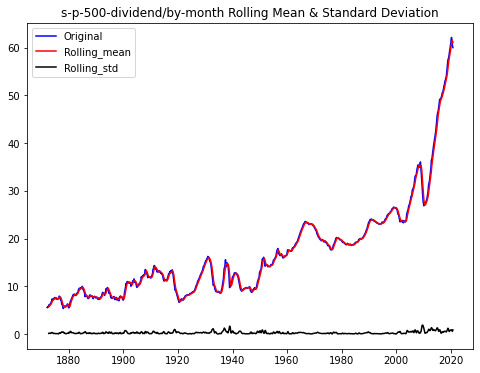

Results of df Test: 

Test Statistic                    3.469944
p-value                           1.000000
#Lags Used                        1.000000
Number of Observations Used    1785.000000
Critical Value (1%)              -3.434019
Critical Value (5%)              -2.863161
Critical Value (10%)             -2.567633
dtype: float64


s-p-500-dividend-yield/by-month


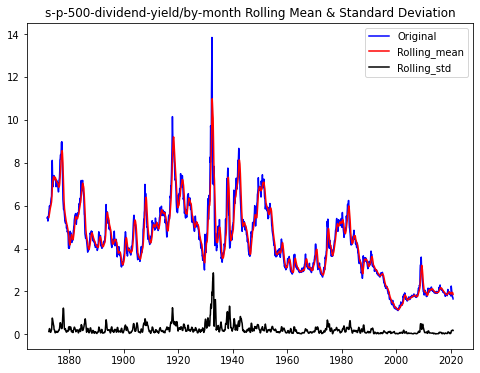

Results of df Test: 

Test Statistic                   -4.064085
p-value                           0.001110
#Lags Used                        1.000000
Number of Observations Used    1785.000000
Critical Value (1%)              -3.434019
Critical Value (5%)              -2.863161
Critical Value (10%)             -2.567633
dtype: float64


s-p-500-earnings/by-month


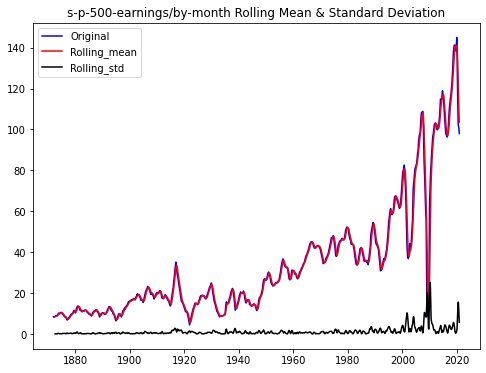

Results of df Test: 

Test Statistic                   -2.627288
p-value                           0.087488
#Lags Used                        1.000000
Number of Observations Used    1785.000000
Critical Value (1%)              -3.434019
Critical Value (5%)              -2.863161
Critical Value (10%)             -2.567633
dtype: float64


s-p-500-earnings-yield/by-month


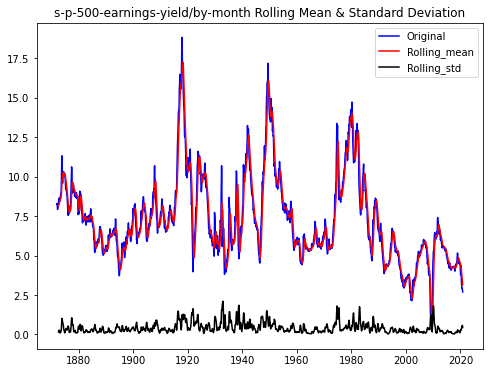

Results of df Test: 

Test Statistic                   -3.788444
p-value                           0.003028
#Lags Used                        1.000000
Number of Observations Used    1785.000000
Critical Value (1%)              -3.434019
Critical Value (5%)              -2.863161
Critical Value (10%)             -2.567633
dtype: float64


s-p-500-pe-ratio/by-month


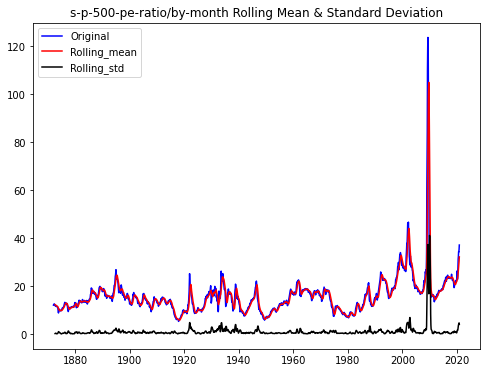

Results of df Test: 

Test Statistic                -8.124141e+00
p-value                        1.135085e-12
#Lags Used                     1.000000e+00
Number of Observations Used    1.785000e+03
Critical Value (1%)           -3.434019e+00
Critical Value (5%)           -2.863161e+00
Critical Value (10%)          -2.567633e+00
dtype: float64


inflation-adjusted-s-p-500/by-month


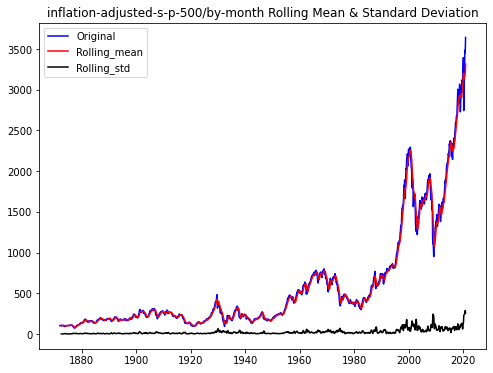

Results of df Test: 

Test Statistic                    3.095903
p-value                           1.000000
#Lags Used                        1.000000
Number of Observations Used    1785.000000
Critical Value (1%)              -3.434019
Critical Value (5%)              -2.863161
Critical Value (10%)             -2.567633
dtype: float64


shiller-pe/by-month


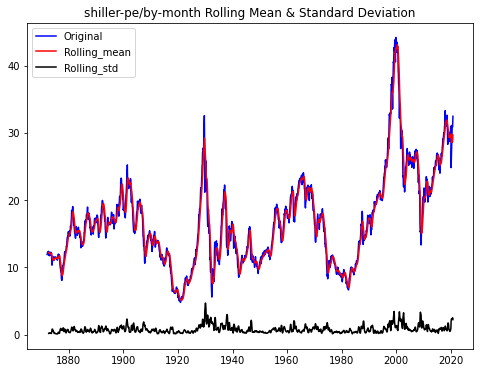

Results of df Test: 

Test Statistic                   -2.280660
p-value                           0.178281
#Lags Used                        1.000000
Number of Observations Used    1785.000000
Critical Value (1%)              -3.434019
Critical Value (5%)              -2.863161
Critical Value (10%)             -2.567633
dtype: float64


10-year-treasury-rate/by-month


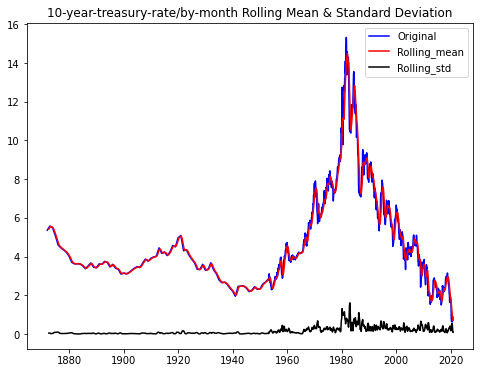

Results of df Test: 

Test Statistic                   -2.001664
p-value                           0.285844
#Lags Used                        1.000000
Number of Observations Used    1785.000000
Critical Value (1%)              -3.434019
Critical Value (5%)              -2.863161
Critical Value (10%)             -2.567633
dtype: float64


cpi/by-month


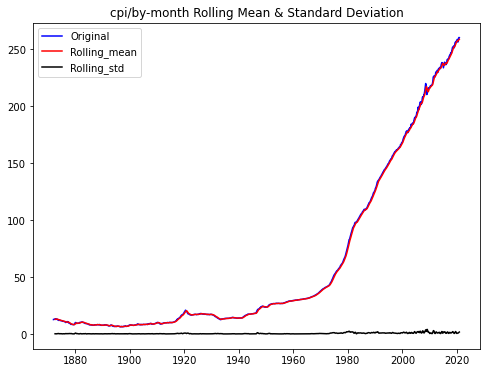

Results of df Test: 

Test Statistic                    8.562693
p-value                           1.000000
#Lags Used                        1.000000
Number of Observations Used    1785.000000
Critical Value (1%)              -3.434019
Critical Value (5%)              -2.863161
Critical Value (10%)             -2.567633
dtype: float64


inflation/by-month


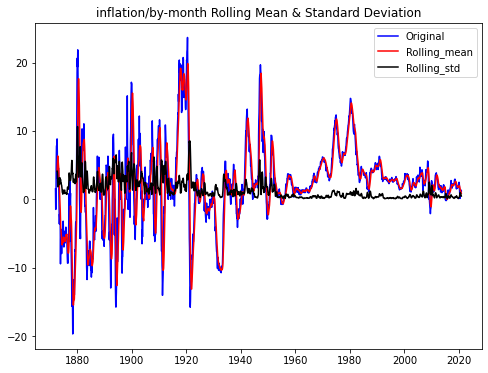

Results of df Test: 

Test Statistic                -6.596097e+00
p-value                        6.919507e-09
#Lags Used                     1.000000e+00
Number of Observations Used    1.785000e+03
Critical Value (1%)           -3.434019e+00
Critical Value (5%)           -2.863161e+00
Critical Value (10%)          -2.567633e+00
dtype: float64




In [487]:
for i in df.columns:
    print(i)
    stat_check(df[i],1)
    print('\n')


In [592]:
# with one lag 7 variables, including price are not stationary
  # 'Price Value', 
  # 's-p-500-dividend/by-month',
  # 's-p-500-earnings/by-month',
  # 'inflation-adjusted-s-p-500/by-month', 
  # 'shiller-pe/by-month',
  # '10-year-treasury-rate/by-month', 
  # 'cpi/by-month', 




Price Value


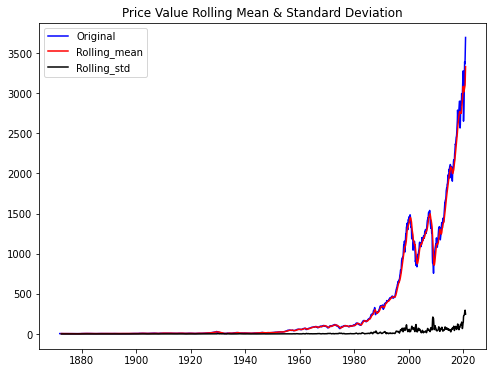

Results of df Test: 

Test Statistic                    4.502378
p-value                           1.000000
#Lags Used                       49.000000
Number of Observations Used    1737.000000
Critical Value (1%)              -3.434120
Critical Value (5%)              -2.863205
Critical Value (10%)             -2.567657
dtype: float64


s-p-500-dividend/by-month


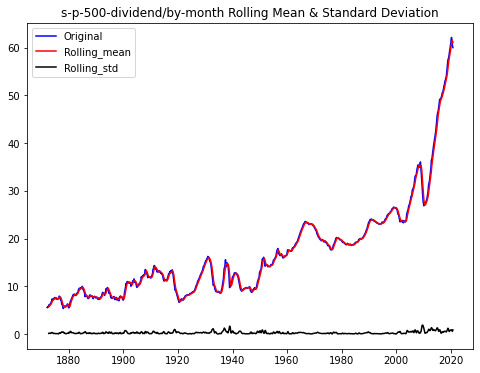

Results of df Test: 

Test Statistic                    1.375254
p-value                           0.996999
#Lags Used                        6.000000
Number of Observations Used    1780.000000
Critical Value (1%)              -3.434029
Critical Value (5%)              -2.863165
Critical Value (10%)             -2.567635
dtype: float64


s-p-500-dividend-yield/by-month


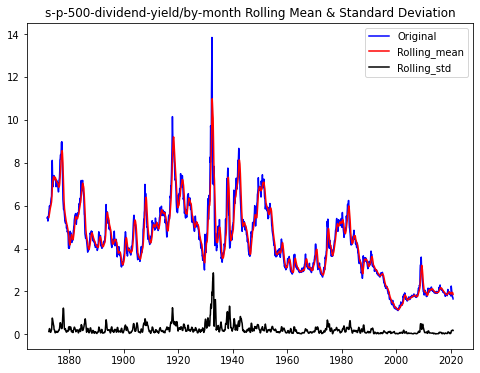

Results of df Test: 

Test Statistic                   -2.946668
p-value                           0.040184
#Lags Used                       21.000000
Number of Observations Used    1765.000000
Critical Value (1%)              -3.434060
Critical Value (5%)              -2.863179
Critical Value (10%)             -2.567643
dtype: float64


s-p-500-earnings/by-month


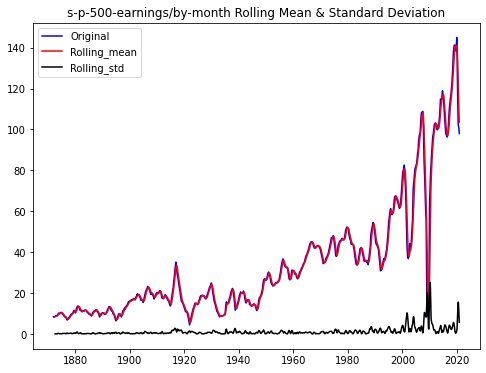

Results of df Test: 

Test Statistic                    0.230362
p-value                           0.973914
#Lags Used                       37.000000
Number of Observations Used    1749.000000
Critical Value (1%)              -3.434094
Critical Value (5%)              -2.863194
Critical Value (10%)             -2.567651
dtype: float64


s-p-500-earnings-yield/by-month


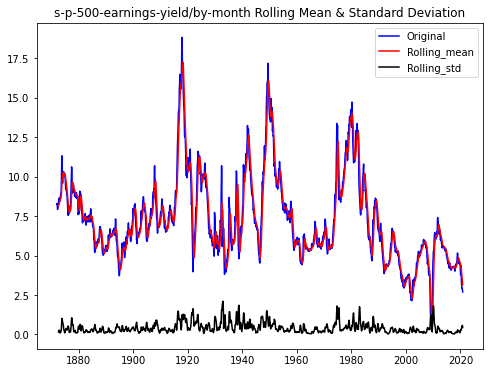

Results of df Test: 

Test Statistic                   -4.352748
p-value                           0.000360
#Lags Used                        5.000000
Number of Observations Used    1781.000000
Critical Value (1%)              -3.434027
Critical Value (5%)              -2.863164
Critical Value (10%)             -2.567635
dtype: float64


s-p-500-pe-ratio/by-month


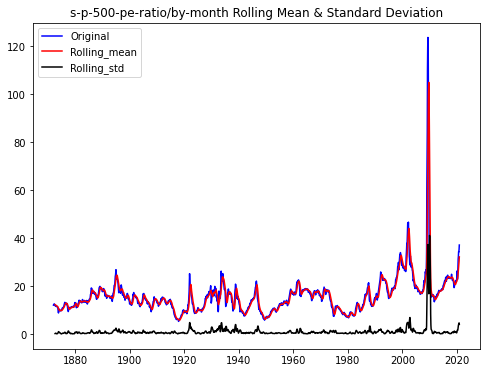

Results of df Test: 

Test Statistic                   -5.255967
p-value                           0.000007
#Lags Used                       14.000000
Number of Observations Used    1772.000000
Critical Value (1%)              -3.434046
Critical Value (5%)              -2.863172
Critical Value (10%)             -2.567639
dtype: float64


inflation-adjusted-s-p-500/by-month


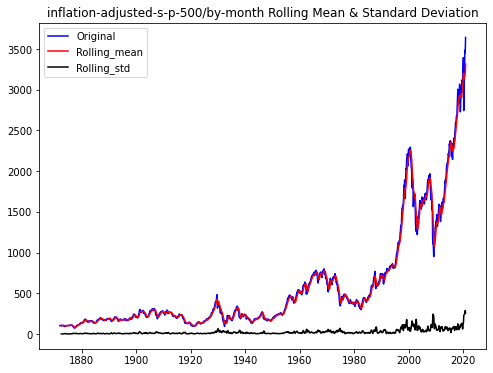

Results of df Test: 

Test Statistic                    2.685109
p-value                           0.999086
#Lags Used                       41.000000
Number of Observations Used    1745.000000
Critical Value (1%)              -3.434103
Critical Value (5%)              -2.863198
Critical Value (10%)             -2.567653
dtype: float64


shiller-pe/by-month


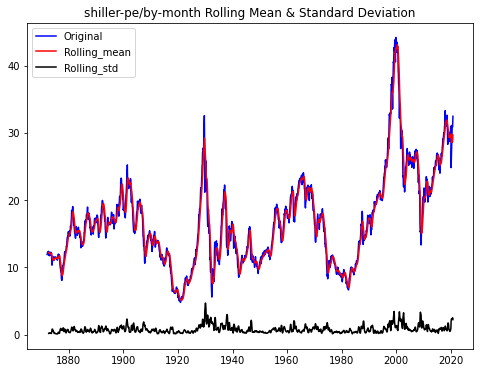

Results of df Test: 

Test Statistic                   -2.737404
p-value                           0.067786
#Lags Used                        8.000000
Number of Observations Used    1778.000000
Critical Value (1%)              -3.434033
Critical Value (5%)              -2.863167
Critical Value (10%)             -2.567636
dtype: float64


10-year-treasury-rate/by-month


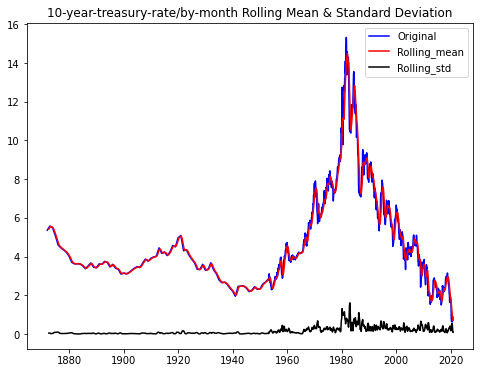

Results of df Test: 

Test Statistic                   -1.640932
p-value                           0.461774
#Lags Used                       50.000000
Number of Observations Used    1736.000000
Critical Value (1%)              -3.434122
Critical Value (5%)              -2.863206
Critical Value (10%)             -2.567657
dtype: float64


cpi/by-month


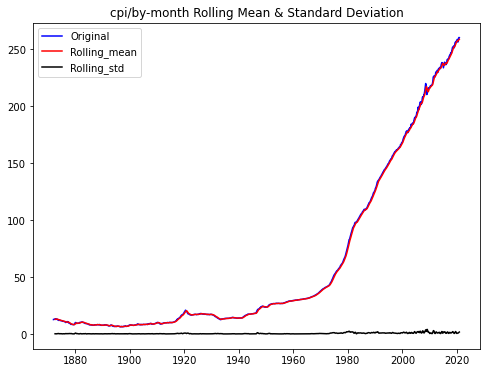

Results of df Test: 

Test Statistic                    2.054232
p-value                           0.998739
#Lags Used                       50.000000
Number of Observations Used    1736.000000
Critical Value (1%)              -3.434122
Critical Value (5%)              -2.863206
Critical Value (10%)             -2.567657
dtype: float64


inflation/by-month


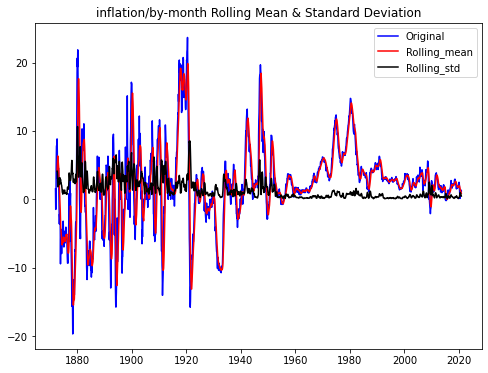

Results of df Test: 

Test Statistic                   -3.958619
p-value                           0.001643
#Lags Used                       50.000000
Number of Observations Used    1736.000000
Critical Value (1%)              -3.434122
Critical Value (5%)              -2.863206
Critical Value (10%)             -2.567657
dtype: float64




In [490]:
for i in df.columns:
    print(i)
    stat_check(df[i],50)
    print('\n')

In [491]:
# after raising the max lags to 50 the same 7 variables still are not stationary 

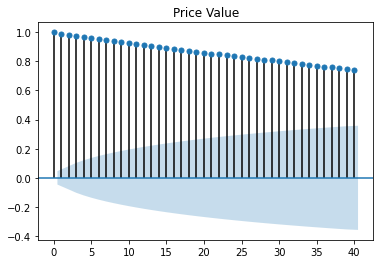

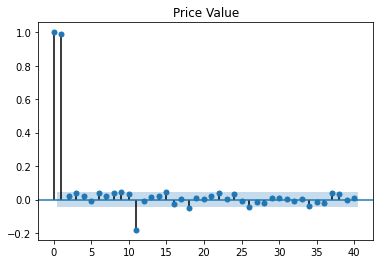

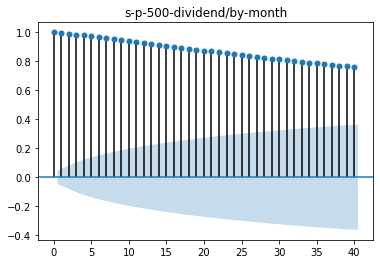

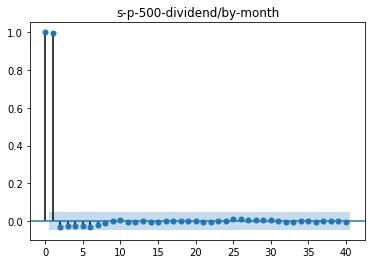

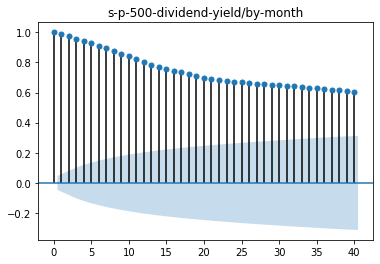

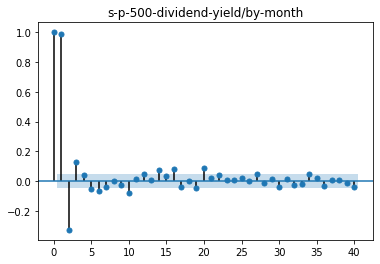

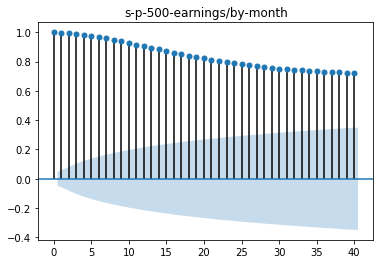

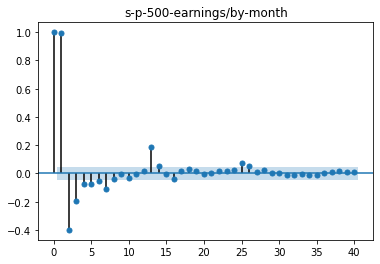

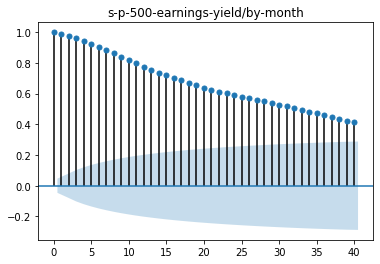

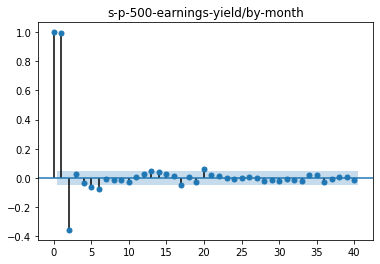

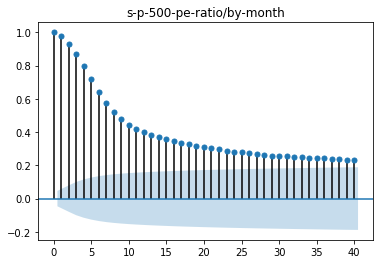

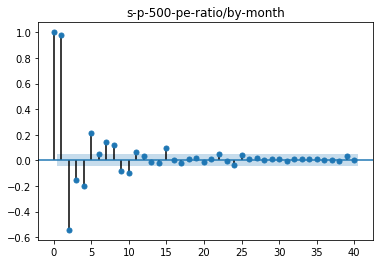

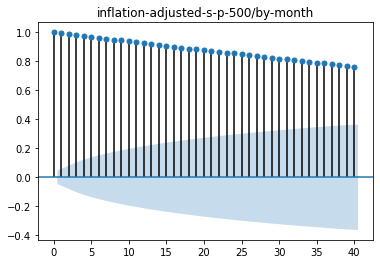

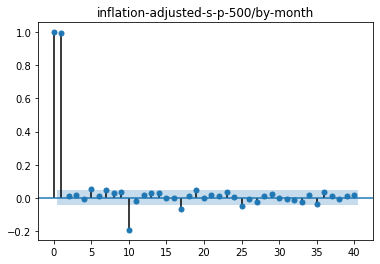

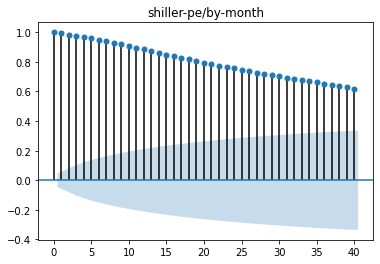

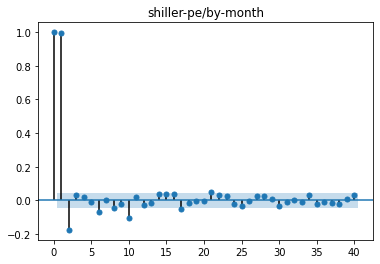

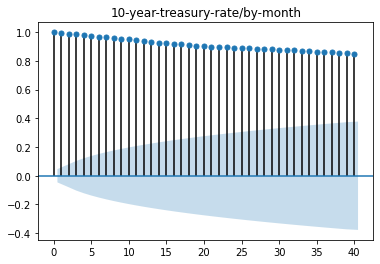

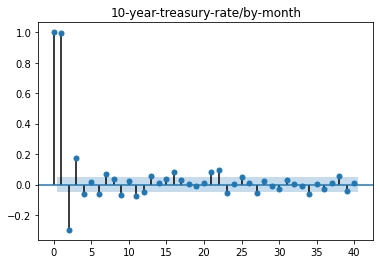

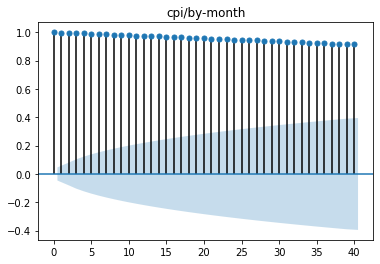

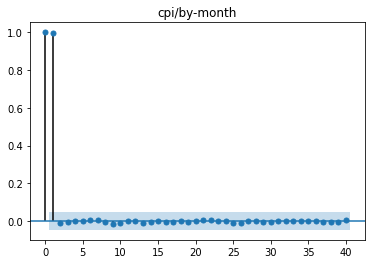

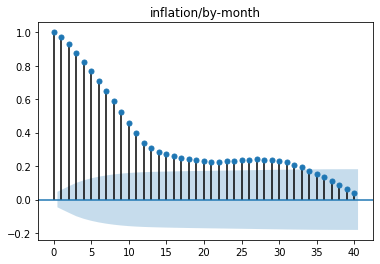

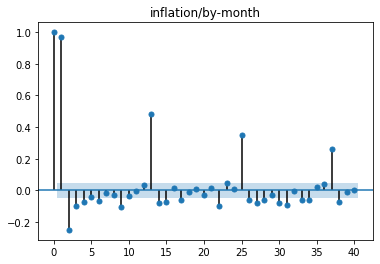

In [492]:
#check acf and pacf for each variable 

for i in df.columns:
#     ax.set_title(str(i))
    plot_acf(df[i],lags=40,title=i)
    plot_pacf(df[i],lags=40,title=i)



In [593]:
# most of the columns look to have ACFs that are significant for the entire data range and PACFs upto 2


In [494]:
# create model to see seasonal_decompose

def s_decomp(data):
    decomposition = seasonal_decompose(data)

    # get the different pieces
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot the different components
    plt.figure(figsize=(8,6))
    plt.subplot(411)
    plt.plot(data, label='Original '+str(data.name), color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend '+str(data.name), color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality '+str(data.name), color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals '+str(data.name), color='blue')
    plt.legend(loc='best')
    plt.tight_layout()


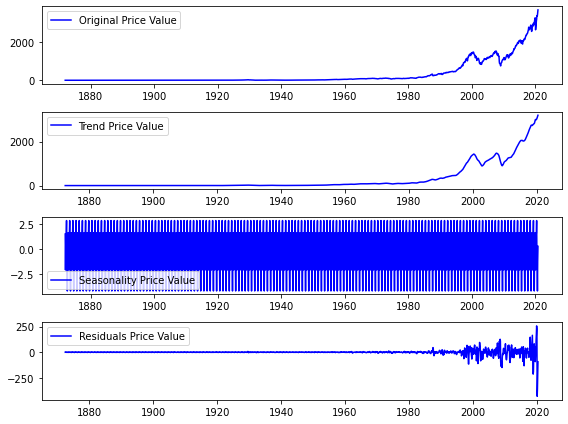

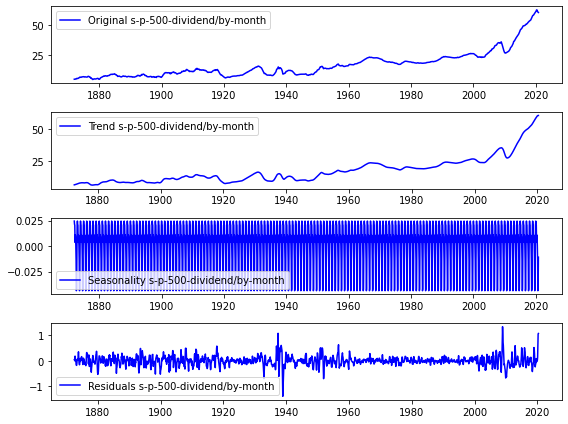

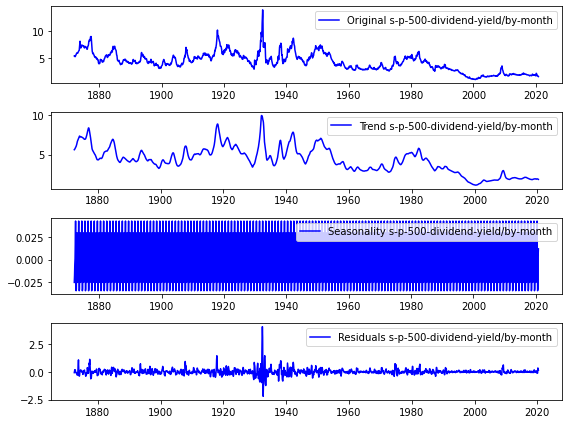

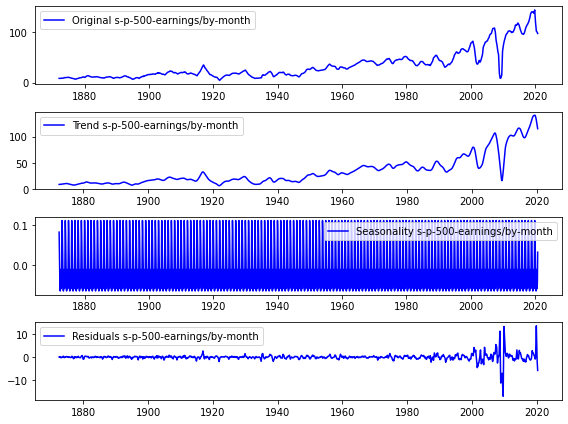

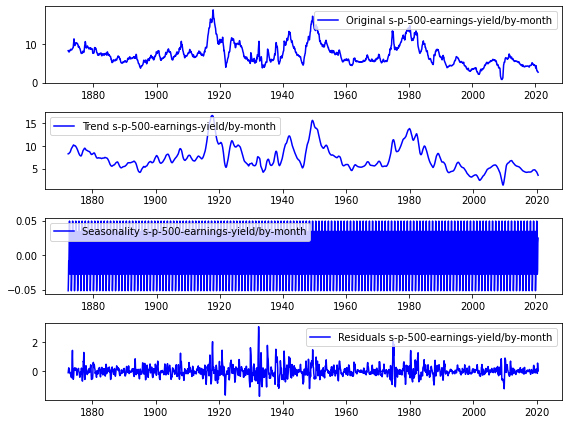

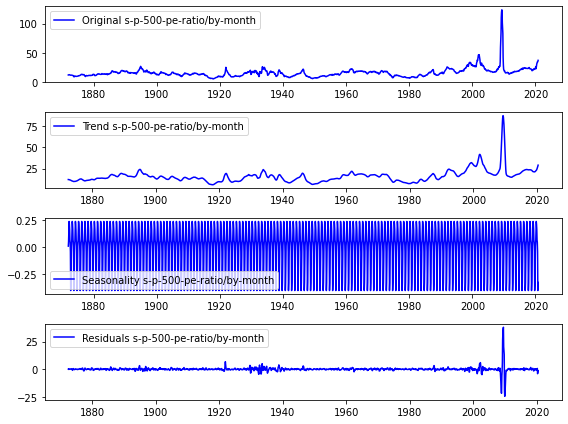

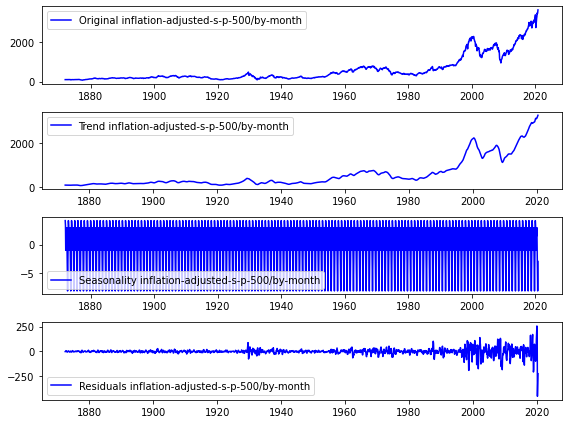

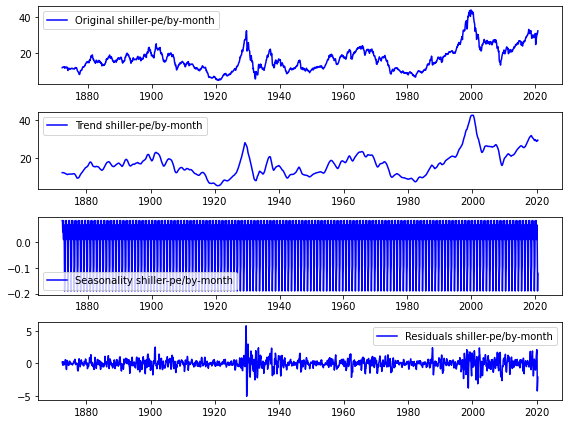

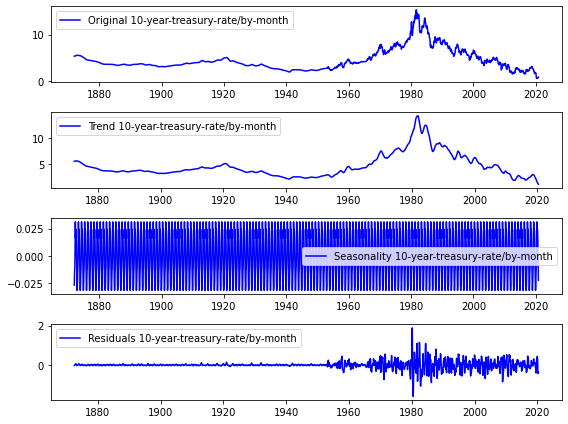

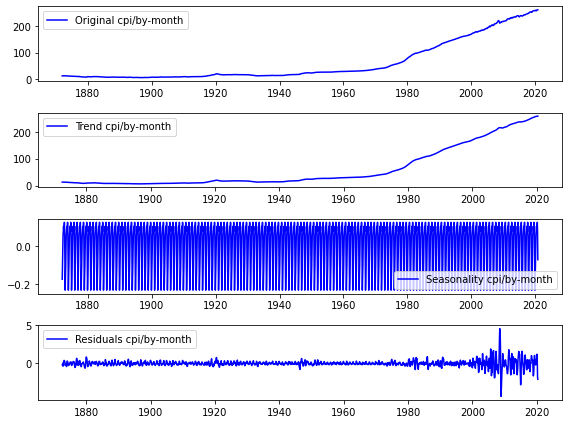

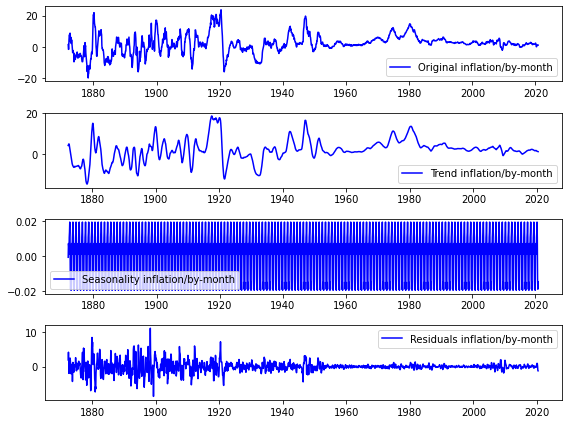

In [495]:
# look at seasonal_decompose for each variable
for i in df.columns:
    s_decomp(df[i])


In [496]:
# most of the column's data trends upward around 1960-1980 and is quite clearly seasonal

## Modeling

In [498]:
len(df)*.8

1429.6000000000001

In [499]:
#use first 1430 data points to train and the remaining to test

In [419]:
# initial model with just price data
def autoModS(data):
    # Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 2)
    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
    # Generate all different combinations of seasonal p, q and q triplets
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    ans = []
    for i in pdq:
        for j in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(data[:1430],
                                                order=i,
                                                seasonal_order=j,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit()
                ans.append([i, j, output.aic])
                print('ARIMA {} x {}12 : AIC Calculated ={}'.format(i, j, output.aic))
            except:
                continue

    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    ans_df.loc[ans_df['aic'].idxmin()]
    inputs=ans_df.loc[ans_df['aic'].idxmin()]
    
        # Fit the model and print results

    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(data[:1430],
                                            order=inputs[0], 
                                            seasonal_order=inputs[1], 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)

    
    results = ARIMA_MODEL.fit()
    
    #predict values
    pred_value=results.predict(start=0,end=1786)
    # get rmse for train and test data
    rmse_train=mean_squared_error(data[:1430],pred_value[:1430],squared=False)
    rmse_test=mean_squared_error(data[1430:],pred_value[1430:],squared=False)
    

    # plot results
    fig = plt.figure(figsize=(10,6))
    orig = plt.plot(data)
    pre=plt.plot(pred_value)
    plt.legend(loc='best')

    # print out metrics
    print(data.name)
    print('aic=',round(results.aic,4),' train RMSE=',round(rmse_train,4),' test RMSE=',round(rmse_test,4) )
    print('p d q')
    print(inputs[0])
    print ('seasonal p d q') 
    print(inputs[1])



ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =16599.049811287554
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =14879.693825699469
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =11251.666607483163
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =11170.227535201377
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =10978.585138532499
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =10794.864620924283
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =11177.143101327358
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =10948.649214122644
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =14655.381508915785
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =12980.333724977809
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =9581.283585425668
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =9512.532440621802
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =9379.832060468194
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =9195.153777791047
ARIMA (0, 

Price Value
aic= 7034.6674  train RMSE= 2.9058  test RMSE= 311.0111
p d q
(1, 0, 1)
seasonal p d q
(0, 1, 1, 12)


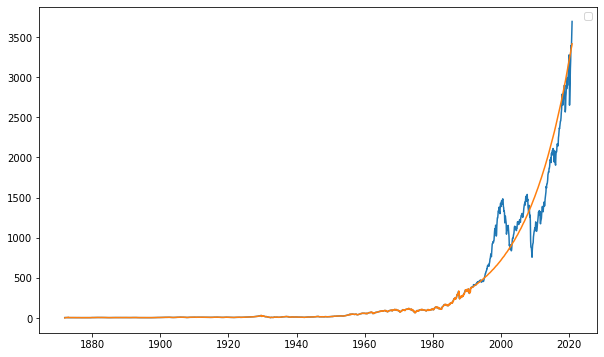

In [420]:
#baseline model
autoModS(df['Price Value'])

In [421]:
#baseline model with no exog variables
# aic= 7034.6674  train RMSE= 2.9058  test RMSE= 311.0111
# model appears to over train

In [422]:
#list of all exog variables
vars=list(df.columns)
vars.remove('Price Value') 
vars

['s-p-500-dividend/by-month',
 's-p-500-dividend-yield/by-month',
 's-p-500-earnings/by-month',
 's-p-500-earnings-yield/by-month',
 's-p-500-pe-ratio/by-month',
 'inflation-adjusted-s-p-500/by-month',
 'shiller-pe/by-month',
 '10-year-treasury-rate/by-month',
 'cpi/by-month',
 'inflation/by-month']

In [423]:
# table of model results
mv_val=['baseline']
mv_val.extend(vars)
model_values=pd.DataFrame(index=['AIC','train_RMSE','test_RMSE'],columns=mv_val)
model_values['baseline']['AIC']=7034.6674
model_values['baseline']['train_RMSE']=2.9058
model_values['baseline']['test_RMSE']=311.0111



model_values

,baseline,s-p-500-dividend/by-month,s-p-500-dividend-yield/by-month,s-p-500-earnings/by-month,s-p-500-earnings-yield/by-month,s-p-500-pe-ratio/by-month,inflation-adjusted-s-p-500/by-month,shiller-pe/by-month,10-year-treasury-rate/by-month,cpi/by-month,inflation/by-month
AIC,7034.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train_RMSE,2.9058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_RMSE,311.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [500]:
# baseline model + variable
def sarimax(data,exo):
  tr=np.array(exo)
  tr=tr.reshape(1787,1)

  ARIMA_MODEL = sm.tsa.statespace.SARIMAX(data[:1430],exog=tr[:1430], order=(1,0,1), seasonal_order=(0,1,1,12) )
  results = ARIMA_MODEL.fit()

  pred_value=results.predict(start=0,end=1786,exog=tr[1430:])

  rmse_train=mean_squared_error(data[:1430],pred_value[:1430],squared=False)
  rmse_test=mean_squared_error(data[1430:],pred_value[1430:],squared=False)

  return round(results.aic,4),round(rmse_train,4),round(rmse_test,4)


In [501]:
# get aic and rmse for basline model with each variable
for i in vars:
  print(str(i))
  model_values[str(i)]['AIC'],model_values[str(i)]['train_RMSE'],model_values[str(i)]['test_RMSE']= sarimax(df['Price Value'],df[i])


s-p-500-dividend/by-month
s-p-500-dividend-yield/by-month
s-p-500-earnings/by-month
s-p-500-earnings-yield/by-month
s-p-500-pe-ratio/by-month
inflation-adjusted-s-p-500/by-month
shiller-pe/by-month
10-year-treasury-rate/by-month
cpi/by-month
inflation/by-month


In [502]:
#results
model_values

,baseline,s-p-500-dividend/by-month,s-p-500-dividend-yield/by-month,s-p-500-earnings/by-month,s-p-500-earnings-yield/by-month,s-p-500-pe-ratio/by-month,inflation-adjusted-s-p-500/by-month,shiller-pe/by-month,10-year-treasury-rate/by-month,cpi/by-month,inflation/by-month
AIC,7034.67,7111.42,7111.5,7104.79,7111.59,7111.8,7111.41,7111.69,7075.68,7111.16,7111.78
train_RMSE,2.9058,2.9266,2.9363,3.0493,2.9365,2.9438,2.9616,2.9654,3.5063,3.0779,2.9532
test_RMSE,311.011,1078.95,1083.58,1105.64,1083.49,1082.13,1091.02,1084.07,1046.6,1070.3,1082.6


In [503]:
#transpose data
model_valuesT=model_values.transpose()

In [504]:
model_valuesT

,AIC,train_RMSE,test_RMSE
baseline,7034.67,2.9058,311.011
s-p-500-dividend/by-month,7111.42,2.9266,1078.95
s-p-500-dividend-yield/by-month,7111.5,2.9363,1083.58
s-p-500-earnings/by-month,7104.79,3.0493,1105.64
s-p-500-earnings-yield/by-month,7111.59,2.9365,1083.49
s-p-500-pe-ratio/by-month,7111.8,2.9438,1082.13
inflation-adjusted-s-p-500/by-month,7111.41,2.9616,1091.02
shiller-pe/by-month,7111.69,2.9654,1084.07
10-year-treasury-rate/by-month,7075.68,3.5063,1046.6
cpi/by-month,7111.16,3.0779,1070.3


In [505]:
# top 5 aic scores
model_valuesT.sort_values(['AIC'])[:5]

,AIC,train_RMSE,test_RMSE
baseline,7034.67,2.9058,311.011
10-year-treasury-rate/by-month,7075.68,3.5063,1046.6
s-p-500-earnings/by-month,7104.79,3.0493,1105.64
cpi/by-month,7111.16,3.0779,1070.3
inflation-adjusted-s-p-500/by-month,7111.41,2.9616,1091.02


In [506]:
# top 5 test scores
model_valuesT.sort_values(['test_RMSE'])[:5]

,AIC,train_RMSE,test_RMSE
baseline,7034.67,2.9058,311.011
10-year-treasury-rate/by-month,7075.68,3.5063,1046.6
cpi/by-month,7111.16,3.0779,1070.3
s-p-500-dividend/by-month,7111.42,2.9266,1078.95
s-p-500-pe-ratio/by-month,7111.8,2.9438,1082.13


In [507]:
# the baseline model has the best AIC and test RMSE
# 10 year treasury-rate, earnings, and cpi had the lowest AIC after the baseline, 
# 10 year treasury-rate, cpi, and dividend had the lowest test RMSE after the baseline




In [510]:
#save initial data
model_valuesT.to_csv('sarimax_results')


In [511]:
# model with pdq tuning and exoog variables
def final1(data,exo):
    # Define the p, d and q parameters to take any value between 0 and 2
  p = d = q = range(0, 2)
    # Generate all different combinations of p, q and q triplets
  pdq = list(itertools.product(p, d, q))
    # Generate all different combinations of seasonal p, q and q triplets
  pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
  ans = []
  for i in pdq:
      for j in pdqs:
          try:
              mod = sm.tsa.statespace.SARIMAX(data[:1430], exog=exo[:1430],
                                                order=i,
                                                seasonal_order=j,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

              output = mod.fit()
              ans.append([i, j, output.aic])
              # print('ARIMA {} x {}12 : AIC Calculated ={}'.format(i, j, output.aic))
          except:
              continue

  ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
  ans_df.loc[ans_df['aic'].idxmin()]
  inputs=ans_df.loc[ans_df['aic'].idxmin()]
    
        # Fit the model and print results

  ARIMA_MODEL = sm.tsa.statespace.SARIMAX(data[:1430], exog=exo[:1430],
                                            order=inputs[0], 
                                            seasonal_order=inputs[1], 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)

    
  result = ARIMA_MODEL.fit()

  pred_value=result.predict(start=0,end=1786,exog=exo[1430:])
  rmse_train=mean_squared_error(data[:1430],pred_value[:1430],squared=False)
  rmse_test=mean_squared_error(data[1430:],pred_value[1430:],squared=False)

  #return metrics
  return round(result.aic,4),round(rmse_train,4),round(rmse_test,4),inputs[0],inputs[1]



In [512]:
#list of top exog variables
vars2=['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month', 'cpi/by-month','s-p-500-dividend/by-month']

all_combinations = []
all_combinationsL = []

#list of all combinations
for r in range(1,len(vars2) + 1):
  combinations_object = itertools.combinations(vars2, r)
  combinations_list = list(combinations_object)
  all_combinations += combinations_list

for i in all_combinations:
  all_combinationsL.append(list(i))
print(len(all_combinationsL))

15


In [513]:
# table of model results
mv_val2=['baseline']
for i in all_combinationsL:
  mv_val2.append(str(i))
model_values2=pd.DataFrame(index=['AIC','train_RMSE','test_RMSE','pdq','Spdq'],columns=mv_val2)
model_values2['baseline']['AIC']=7034.6674
model_values2['baseline']['train_RMSE']=2.9058
model_values2['baseline']['test_RMSE']=311.0111

model_values2

,baseline,['10-year-treasury-rate/by-month'],['s-p-500-earnings/by-month'],['cpi/by-month'],['s-p-500-dividend/by-month'],"['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month']","['10-year-treasury-rate/by-month', 'cpi/by-month']","['10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']","['s-p-500-earnings/by-month', 'cpi/by-month']","['s-p-500-earnings/by-month', 's-p-500-dividend/by-month']","['cpi/by-month', 's-p-500-dividend/by-month']","['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month', 'cpi/by-month']","['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month', 's-p-500-dividend/by-month']","['10-year-treasury-rate/by-month', 'cpi/by-month', 's-p-500-dividend/by-month']","['s-p-500-earnings/by-month', 'cpi/by-month', 's-p-500-dividend/by-month']","['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month', 'cpi/by-month', 's-p-500-dividend/by-month']"
AIC,7034.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
train_RMSE,2.9058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_RMSE,311.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spdq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [514]:
# run above model with all top variable combinations and add to table
for i in all_combinationsL:
  print(str(i))
  model_values2[str(i)]['AIC'],model_values2[str(i)]['train_RMSE'],model_values2[str(i)]['test_RMSE'],model_values2[str(i)]['pdq'],model_values2[str(i)]['Spdq']= final1(df['Price Value'],df[i])


['10-year-treasury-rate/by-month']
['s-p-500-earnings/by-month']
['cpi/by-month']
['s-p-500-dividend/by-month']
['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month']
['10-year-treasury-rate/by-month', 'cpi/by-month']
['10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']
['s-p-500-earnings/by-month', 'cpi/by-month']
['s-p-500-earnings/by-month', 's-p-500-dividend/by-month']
['cpi/by-month', 's-p-500-dividend/by-month']
['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month', 'cpi/by-month']
['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month', 's-p-500-dividend/by-month']
['10-year-treasury-rate/by-month', 'cpi/by-month', 's-p-500-dividend/by-month']
['s-p-500-earnings/by-month', 'cpi/by-month', 's-p-500-dividend/by-month']
['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month', 'cpi/by-month', 's-p-500-dividend/by-month']


In [515]:
model_values2

,baseline,['10-year-treasury-rate/by-month'],['s-p-500-earnings/by-month'],['cpi/by-month'],['s-p-500-dividend/by-month'],"['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month']","['10-year-treasury-rate/by-month', 'cpi/by-month']","['10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']","['s-p-500-earnings/by-month', 'cpi/by-month']","['s-p-500-earnings/by-month', 's-p-500-dividend/by-month']","['cpi/by-month', 's-p-500-dividend/by-month']","['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month', 'cpi/by-month']","['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month', 's-p-500-dividend/by-month']","['10-year-treasury-rate/by-month', 'cpi/by-month', 's-p-500-dividend/by-month']","['s-p-500-earnings/by-month', 'cpi/by-month', 's-p-500-dividend/by-month']","['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month', 'cpi/by-month', 's-p-500-dividend/by-month']"
AIC,7034.67,7001.53,7029.65,7028.34,7036.4,6997.92,6998.53,7003.31,7016.29,7027.73,7028.83,6990.53,6996.93,7006.23,7021.65,6999.08
train_RMSE,2.9058,2.9889,2.9182,3.0288,2.9022,3.0309,3.1699,2.9726,3.2404,2.8954,3.1542,3.3911,2.9802,2.9798,3.0381,2.9959
test_RMSE,311.011,289.485,300.207,653.433,313.549,328.436,440.346,289.355,553.199,311.372,704.811,381.483,345.828,956.943,543.736,1035.71
pdq,NaN,"(1, 0, 1)","(1, 0, 1)","(1, 0, 1)","(1, 0, 1)","(1, 0, 1)","(1, 0, 1)","(1, 0, 1)","(1, 0, 1)","(1, 0, 1)","(1, 0, 1)","(1, 0, 1)","(1, 0, 1)","(0, 1, 1)","(1, 0, 1)","(0, 1, 1)"
Spdq,NaN,"(0, 1, 1, 12)","(0, 1, 1, 12)","(0, 1, 1, 12)","(0, 1, 1, 12)","(0, 1, 1, 12)","(0, 1, 1, 12)","(0, 1, 1, 12)","(0, 1, 1, 12)","(0, 1, 1, 12)","(0, 1, 1, 12)","(0, 1, 1, 12)","(0, 1, 1, 12)","(1, 1, 1, 12)","(0, 1, 1, 12)","(0, 1, 1, 12)"


In [517]:
model_values2.to_csv('results2')

In [520]:
model_values2T=model_values2.transpose()

In [521]:
# top 5 aic values
model_values2T.sort_values(['AIC'])[:5]

,AIC,train_RMSE,test_RMSE,pdq,Spdq
"['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month', 'cpi/by-month']",6990.53,3.3911,381.483,"(1, 0, 1)","(0, 1, 1, 12)"
"['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month', 's-p-500-dividend/by-month']",6996.93,2.9802,345.828,"(1, 0, 1)","(0, 1, 1, 12)"
"['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month']",6997.92,3.0309,328.436,"(1, 0, 1)","(0, 1, 1, 12)"
"['10-year-treasury-rate/by-month', 'cpi/by-month']",6998.53,3.1699,440.346,"(1, 0, 1)","(0, 1, 1, 12)"
"['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month', 'cpi/by-month', 's-p-500-dividend/by-month']",6999.08,2.9959,1035.71,"(0, 1, 1)","(0, 1, 1, 12)"


In [522]:
# top 5 test RMSE values

model_values2T.sort_values(['test_RMSE'])[:5]

,AIC,train_RMSE,test_RMSE,pdq,Spdq
"['10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']",7003.31,2.9726,289.355,"(1, 0, 1)","(0, 1, 1, 12)"
['10-year-treasury-rate/by-month'],7001.53,2.9889,289.485,"(1, 0, 1)","(0, 1, 1, 12)"
['s-p-500-earnings/by-month'],7029.65,2.9182,300.207,"(1, 0, 1)","(0, 1, 1, 12)"
baseline,7034.67,2.9058,311.011,NaN,NaN
"['s-p-500-earnings/by-month', 's-p-500-dividend/by-month']",7027.73,2.8954,311.372,"(1, 0, 1)","(0, 1, 1, 12)"


In [523]:
# 4 of the 5 models by AIC included 10-year-treasury-rate/by-month and s-p-500-earnings/by-month
# treasury rats, dividend, and earings were all in the 5 best tesst RMSE along with the baseline

In [528]:
# vizualize the above models
def final_V(data,exo,pdq,pdqS):
   

  ARIMA_MODEL = sm.tsa.statespace.SARIMAX(data[:1430], exog=exo[:1430],
                                            order=pdq, 
                                            seasonal_order=pdqS, 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)

    
  result = ARIMA_MODEL.fit()

  pred_value=result.predict(start=df.index[0],end=df.index[-1],exog=exo[1430:])
  rmse_train=mean_squared_error(data[:1430],pred_value[:1430],squared=False)
  rmse_test=mean_squared_error(data[1430:],pred_value[1430:],squared=False)


  finR=pd.DataFrame({'data':data,'pred':pred_value})
  
  # print results
  print (list(exo.columns))
  print ('aic=',round(result.aic,4),' train RMSE=',round(rmse_train,4),' test RMSE=',round(rmse_test,4) )
  print (result.summary())

  #plot results
  fig = plt.figure(figsize=(12,7))
  orig = plt.plot(finR['data'][1430:], color='blue',label='Original')
  pre = plt.plot(finR['pred'][1430:], color='red', label='predict')
  plt.legend(loc='best')
  plt.show(block=False)



['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month', 'cpi/by-month']
aic= 6990.5346  train RMSE= 3.3911  test RMSE= 381.4828
                                     SARIMAX Results                                      
Dep. Variable:                        Price Value   No. Observations:                 1430
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -3488.267
Date:                            Wed, 09 Jun 2021   AIC                           6990.535
Time:                                    23:57:04   BIC                           7027.264
Sample:                                01-01-1872   HQIC                          7004.263
                                     - 02-01-1991                                         
Covariance Type:                              opg                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

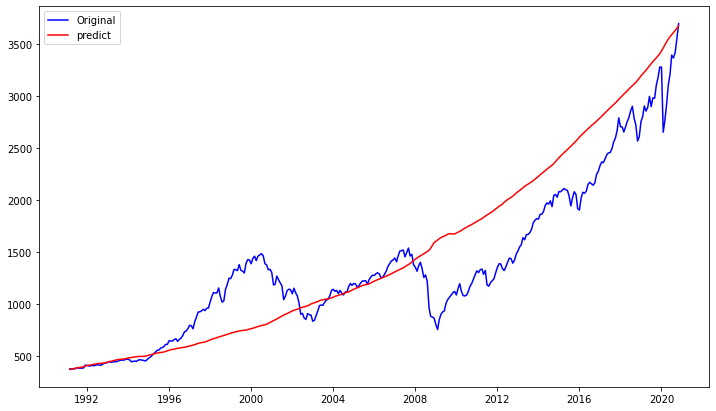

In [529]:
# best AIC
final_V(df['Price Value'],df[['10-year-treasury-rate/by-month', 's-p-500-earnings/by-month', 'cpi/by-month']	],(1,0,1),(0,1,1,12))

['10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']
aic= 7003.3133  train RMSE= 2.9726  test RMSE= 289.3551
                                     SARIMAX Results                                      
Dep. Variable:                        Price Value   No. Observations:                 1430
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -3495.657
Date:                            Wed, 09 Jun 2021   AIC                           7003.313
Time:                                    23:58:16   BIC                           7034.796
Sample:                                01-01-1872   HQIC                          7015.080
                                     - 02-01-1991                                         
Covariance Type:                              opg                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

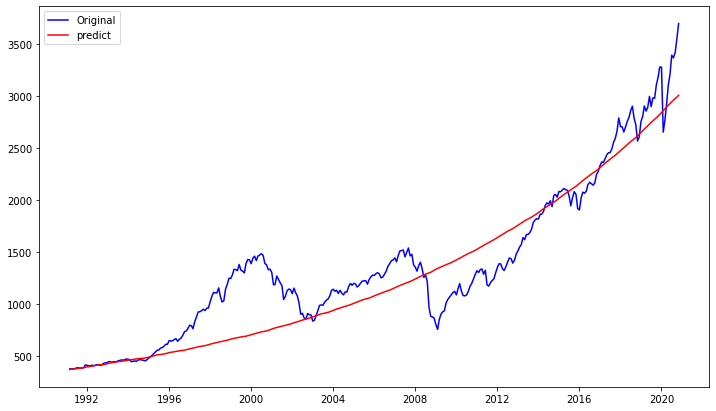

In [530]:
# best RMSE test
final_V(df['Price Value'],df[['10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']],(1,0,1),(0,1,1,12))

['10-year-treasury-rate/by-month']
aic= 7001.5277  train RMSE= 2.9889  test RMSE= 289.4854
                                     SARIMAX Results                                      
Dep. Variable:                        Price Value   No. Observations:                 1430
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -3495.764
Date:                            Thu, 10 Jun 2021   AIC                           7001.528
Time:                                    00:00:35   BIC                           7027.763
Sample:                                01-01-1872   HQIC                          7011.334
                                     - 02-01-1991                                         
Covariance Type:                              opg                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

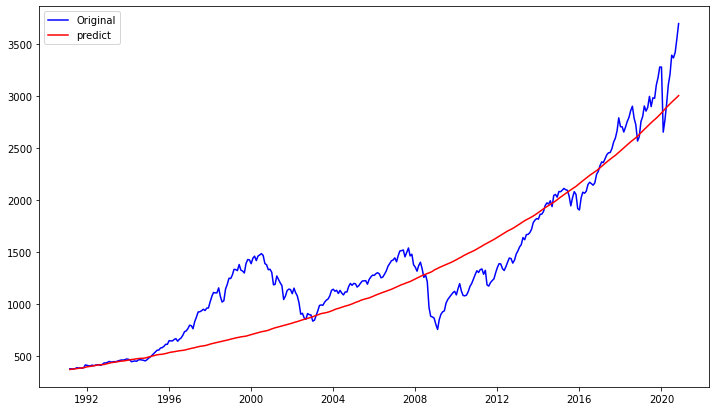

In [532]:
# 2nd best test rmse and very simple
final_V(df['Price Value'],df[['10-year-treasury-rate/by-month']],(1,0,1),(0,1,1,12))


## Analysis
My final 3 models included some combination of treasury rates, dividend, cpi, and earnings. 
They had AICs ranging from 30 to 45 better but only 0.44% to 0.64%.

For 2 of the models test RMSEs were ~22 or 6.5%-7.2% better
but 70 or 22.5% worse for one.

Most noteably the 10 year treasury rate was significant in all 3 models with a coefficient ranging from -2.7 to -3 meaning with a reasonable degree of certantry we can say if it moves down the S&P 500 will likely go up. 


## secondary modeling with facebook prophet 

In [450]:
# install/import facebook prophet
! pip install prophet
from prophet import Prophet


In [533]:
#make df for prophet model
pro_df=df
pro_df['ds']=pro_df.index
pro_df['y']=pro_df['Price Value']

In [534]:
#baseline prophet model with no added variables
def proph_m(data): 
  #build model 
  m = Prophet()
  m.fit(data[:1430])


  #predict test values
  future = m.make_future_dataframe(periods=357)
  forecast = m.predict(future)


  # calculate RMSEs
  rmse_train=mean_squared_error(data['y'][:1430],forecast['yhat'][:1430],squared=False)
  rmse_test=mean_squared_error(data['y'][1430:],forecast['yhat'][1430:],squared=False)

  print(' train RMSE=',round(rmse_train,4),' test RMSE=',round(rmse_test,4) )



In [535]:
# baseline prophet model
proph_m(pro_df[['ds','y']])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 train RMSE= 21.5287  test RMSE= 1332.0254


In [536]:
# Both of these metrics are notably worse than the prior models and the ARIMA baseline

In [537]:
# prophet model with 1 added variable
def proph_m2(data,exo):  
  # build model with 1 added regressor
  m = Prophet()
  m.add_regressor(exo)
  m.fit(data[:1430])


  # make table of predicted values
  future = m.make_future_dataframe(periods=357)
  future.set_index(data.index,inplace=True)
  future[exo] =data[exo]

  forecast = m.predict(future)

  #calculate RMSEs
  rmse_train=mean_squared_error(data['y'][:1430],forecast['yhat'][:1430],squared=False)
  rmse_test=mean_squared_error(data['y'][1430:],forecast['yhat'][1430:],squared=False)

  #return results
  return round(rmse_train,4), round(rmse_test,4) 





In [538]:
# table of prophet model results
pr_val=['baseline']
pr_val.extend(vars)
pr_values=pd.DataFrame(index=['train_RMSE','test_RMSE'], columns=pr_val)
pr_values['baseline']['train_RMSE']=21.5287
pr_values['baseline']['test_RMSE']=1332.0254

In [539]:
# get rmse metrics for baseline with each variable
for i in vars:  
  print(i)
  pr_values[str(i)]['train_RMSE'],pr_values[str(i)]['test_RMSE'] = proph_m2(pro_df[['ds','y',i]],i)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


s-p-500-dividend/by-month


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


s-p-500-dividend/by-month
s-p-500-dividend-yield/by-month


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


s-p-500-dividend-yield/by-month
s-p-500-earnings/by-month


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


s-p-500-earnings/by-month
s-p-500-earnings-yield/by-month


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


s-p-500-earnings-yield/by-month
s-p-500-pe-ratio/by-month


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


s-p-500-pe-ratio/by-month
inflation-adjusted-s-p-500/by-month


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


inflation-adjusted-s-p-500/by-month
shiller-pe/by-month


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


shiller-pe/by-month
10-year-treasury-rate/by-month


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10-year-treasury-rate/by-month
cpi/by-month


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


cpi/by-month
inflation/by-month
inflation/by-month


In [540]:
# transpose retults and sort by test RMSE value
pr_values.transpose().sort_values(['test_RMSE'])


,train_RMSE,test_RMSE
inflation-adjusted-s-p-500/by-month,9.3469,976.626
cpi/by-month,19.77,1184.16
10-year-treasury-rate/by-month,14.7064,1223
s-p-500-dividend/by-month,19.7244,1257.55
shiller-pe/by-month,15.839,1268.77
s-p-500-pe-ratio/by-month,18.1629,1294.62
s-p-500-earnings-yield/by-month,17.9411,1307.69
s-p-500-dividend-yield/by-month,19.6504,1315.23
inflation/by-month,21.2222,1329.45
baseline,21.5287,1332.03


In [541]:
# almost all the variables inproved the model but it is still highly inaccurate 

In [543]:
# prophet model with any number of variables
def proph_ex(exo):
  #build model and add regressors
  m = Prophet()
  for i in exo:
    m.add_regressor(i)
  fit_data=['ds','y']
  fit_data.extend(exo)
  m.fit
  m.fit(pro_df[fit_data] [:1430])
  
  # make table of current and predicted values
  future = m.make_future_dataframe(periods=357)
  future.set_index(pro_df.index,inplace=True)

  for i in exo:
    future[str(i)]=pro_df[i]

  forecast = m.predict(future)

  # calculate errors
  rmse_train=mean_squared_error(pro_df['y'][:1430],forecast['yhat'][:1430],squared=False)
  rmse_test=mean_squared_error(pro_df['y'][1430:],forecast['yhat'][1430:],squared=False)
  
  return round(rmse_train,4), round(rmse_test,4) 


In [573]:
#list of top prophet exog variables
vars_pro=['inflation-adjusted-s-p-500/by-month','cpi/by-month','10-year-treasury-rate/by-month','s-p-500-dividend/by-month']

all_combinations2 = []
all_combinationsL2 = []

#list of all combinations
for r in range(1,len(vars_pro) + 1):
  combinations_object2 = itertools.combinations(vars_pro, r)
  combinations_list2 = list(combinations_object2)
  all_combinations2 += combinations_list2

for i in all_combinations2:
  all_combinationsL2.append(list(i))
print(len(all_combinationsL2))

15


In [574]:
# table of prophet model results
pr_val2=['baseline']
for i in all_combinationsL2:
  pr_val2.append(str(i))

pr_values2=pd.DataFrame(index=['train_RMSE','test_RMSE'], columns=pr_val2)
pr_values2['baseline']['train_RMSE']=21.5287
pr_values2['baseline']['test_RMSE']=1332.0254
pr_values2




,baseline,['inflation-adjusted-s-p-500/by-month'],['cpi/by-month'],['10-year-treasury-rate/by-month'],['s-p-500-dividend/by-month'],"['inflation-adjusted-s-p-500/by-month', 'cpi/by-month']","['inflation-adjusted-s-p-500/by-month', '10-year-treasury-rate/by-month']","['inflation-adjusted-s-p-500/by-month', 's-p-500-dividend/by-month']","['cpi/by-month', '10-year-treasury-rate/by-month']","['cpi/by-month', 's-p-500-dividend/by-month']","['10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']","['inflation-adjusted-s-p-500/by-month', 'cpi/by-month', '10-year-treasury-rate/by-month']","['inflation-adjusted-s-p-500/by-month', 'cpi/by-month', 's-p-500-dividend/by-month']","['inflation-adjusted-s-p-500/by-month', '10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']","['cpi/by-month', '10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']","['inflation-adjusted-s-p-500/by-month', 'cpi/by-month', '10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']"
train_RMSE,21.5287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_RMSE,1332.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [575]:
# run above model and add meterics to table
for i in all_combinationsL2:
  print(i)
  pr_values2[str(i)]['train_RMSE'],pr_values2[str(i)]['test_RMSE']= proph_ex(i)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['inflation-adjusted-s-p-500/by-month']


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['cpi/by-month']


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['10-year-treasury-rate/by-month']


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['s-p-500-dividend/by-month']


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['inflation-adjusted-s-p-500/by-month', 'cpi/by-month']


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['inflation-adjusted-s-p-500/by-month', '10-year-treasury-rate/by-month']


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['inflation-adjusted-s-p-500/by-month', 's-p-500-dividend/by-month']


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['cpi/by-month', '10-year-treasury-rate/by-month']


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['cpi/by-month', 's-p-500-dividend/by-month']


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['inflation-adjusted-s-p-500/by-month', 'cpi/by-month', '10-year-treasury-rate/by-month']


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['inflation-adjusted-s-p-500/by-month', 'cpi/by-month', 's-p-500-dividend/by-month']


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['inflation-adjusted-s-p-500/by-month', '10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['cpi/by-month', '10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['inflation-adjusted-s-p-500/by-month', 'cpi/by-month', '10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']


In [581]:
#results
pr_values2.transpose().sort_values(['test_RMSE'])


,train_RMSE,test_RMSE
"['inflation-adjusted-s-p-500/by-month', 'cpi/by-month', '10-year-treasury-rate/by-month']",6.9302,891.681
"['inflation-adjusted-s-p-500/by-month', 'cpi/by-month', '10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']",6.9428,892.799
"['inflation-adjusted-s-p-500/by-month', 'cpi/by-month']",9.221,899.745
"['inflation-adjusted-s-p-500/by-month', 'cpi/by-month', 's-p-500-dividend/by-month']",9.2851,901.443
"['cpi/by-month', '10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']",10.2073,974.124
['inflation-adjusted-s-p-500/by-month'],9.3469,976.626
"['inflation-adjusted-s-p-500/by-month', 's-p-500-dividend/by-month']",9.4031,978.611
"['cpi/by-month', '10-year-treasury-rate/by-month']",10.5328,987.305
"['inflation-adjusted-s-p-500/by-month', '10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']",8.3913,1003.33
"['inflation-adjusted-s-p-500/by-month', '10-year-treasury-rate/by-month']",8.4322,1005.25


In [582]:
# none of the model's test RMSEs are very good 

In [587]:
#graph the top 3 prohpet models
def proph_ex_viz(exo):

  # same model as above...
  m = Prophet()
  for i in exo:
    m.add_regressor(i)
  fit_data=['ds','y']
  fit_data.extend(exo)
  m.fit
  m.fit(pro_df[fit_data] [:1430])
  
  future = m.make_future_dataframe(periods=357)
  future.set_index(pro_df.index,inplace=True)

  for i in exo:
    future[str(i)]=pro_df[i]

  forecast = m.predict(future)
  rmse_train=mean_squared_error(pro_df['y'][:1430],forecast['yhat'][:1430],squared=False)
  rmse_test=mean_squared_error(pro_df['y'][1430:],forecast['yhat'][1430:],squared=False)

  # with plotting of results
  print(exo)
  print(' train RMSE=',round(rmse_train,4),' test RMSE=',round(rmse_test,4) )
  fig1 = m.plot(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['inflation-adjusted-s-p-500/by-month', 'cpi/by-month', '10-year-treasury-rate/by-month']
 train RMSE= 6.9302  test RMSE= 891.6805


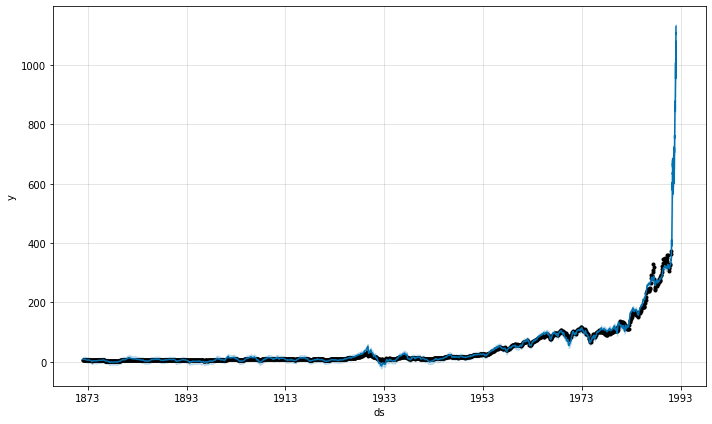

In [586]:
# best prophet model
proph_ex_viz(['inflation-adjusted-s-p-500/by-month', 'cpi/by-month', '10-year-treasury-rate/by-month']	)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['inflation-adjusted-s-p-500/by-month', 'cpi/by-month', '10-year-treasury-rate/by-month', 's-p-500-dividend/by-month']
 train RMSE= 6.9428  test RMSE= 892.7995


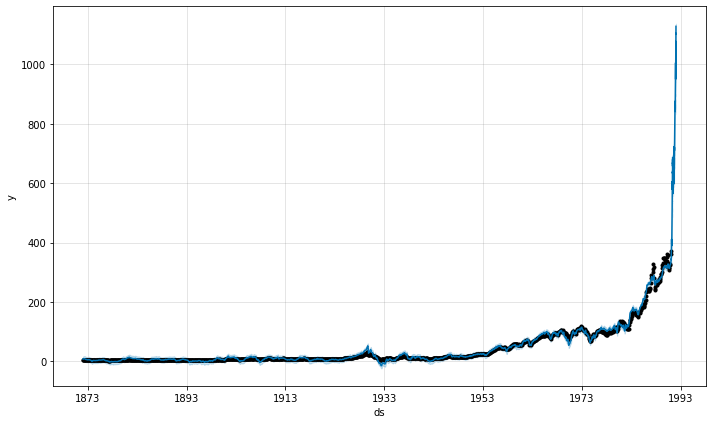

In [589]:
# 2nd best prophet model

proph_ex_viz(['inflation-adjusted-s-p-500/by-month', 'cpi/by-month', '10-year-treasury-rate/by-month', 's-p-500-dividend/by-month'])	

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


['inflation-adjusted-s-p-500/by-month', 'cpi/by-month']
 train RMSE= 9.221  test RMSE= 899.7445


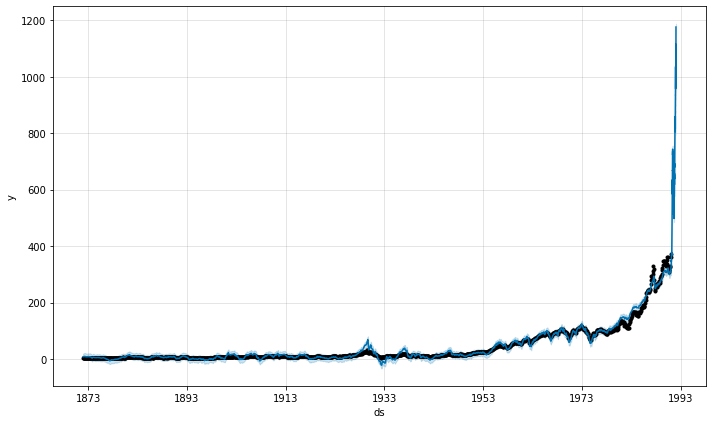

In [590]:
# 3rd best prophet model

proph_ex_viz(['inflation-adjusted-s-p-500/by-month', 'cpi/by-month']	)


## Analysis
My final 3 models included both the inflation adusted price and cpi, and 2 included the 10 year treasury rate. 

The test RMSEs were between 333 and 341 (25-26%) beter then their baseline. However they were all more than double the AIRMA basline.



# Conclusion
Given the lack of any of my models to accuracy predict within their test sets more work should be done before relying on these model's predicted prices.

That said, given that the 10 year treasury rate was found in 5 of my 6 best models and was always significant, it makes sense to monitor this variable.
Adiitionally, inflation and consumer costs should probly be consider giver there ability to improve the predictability of models 



# Future Work
Given that all of my models failed to accurately prdict prices, I should look into other forms of analysis, such as LSTM, as well as, working to further fintine my existing model.

It is also worth looking for more, different, variables that might be more explanatory.

Finally, all my data was monthly so it is possible that there are some intra-month trends that could help.
